In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

### Data Collection

In [56]:
import requests

# URLs of the files
train_data_url = 'https://www.raphaelcousin.com/modules/data-science-practice/module5/exercise/module5_exercise_train.csv'
test_data_url = 'https://www.raphaelcousin.com/modules/data-science-practice/module5/exercise/module5_exercise_test.csv'

# Function to download a file
def download_file(url, file_name):
    response = requests.get(url)
    response.raise_for_status()  # Ensure we notice bad responses
    with open(file_name, 'wb') as file:
        file.write(response.content)
    print(f'Downloaded {file_name} from {url}')

# Downloading the files
download_file(train_data_url, 'module5_exercise_train.csv')
download_file(test_data_url, 'module5_exercise_test.csv')

Downloaded module5_exercise_train.csv from https://www.raphaelcousin.com/modules/data-science-practice/module5/exercise/module5_exercise_train.csv
Downloaded module5_exercise_test.csv from https://www.raphaelcousin.com/modules/data-science-practice/module5/exercise/module5_exercise_test.csv


In [57]:
df_train =  pd.read_csv("module5_exercise_train.csv", sep=",")
df_test =  pd.read_csv("module5_exercise_test.csv", sep=",")

### Data analysis

In [58]:
#### Make a complete analysis on data preprocessing
# Inconsistencies
# Duplicates (data.duplicated().sum())
# Missing values (data.isnull().sum())
# Categorical
# Outliers
# Feature Engineering
# Feature Selection and/or Dimensionality Reduction

In [59]:
data = pd.concat([df_train, df_test], axis=0)

In [60]:
df_train.shape
df_train.head()

,date,weather_condition,humidity,wind_speed,oil_brent_price_indicator,temperature_station1,temperature_station2,temperature_station3,temperature_station4,temperature_station5,temperature_station6,temperature_station7,temperature_station8,temperature_station9,temperature_station10,electricity_demand
0,2015-01-08,Cloudy,69.304377,27.74 km/h,Moderate,0.369411,NaN,0.159977,0.118224,-0.444455,0.313675,0.106192,0.369430,1.279470,-0.384661,273.511353
1,2015-01-09,Sunny,55.955975,21.78 km/h,Moderate,2.009903,NaN,1.617242,NaN,2.160063,2.515627,1.867474,1.953165,1.878233,1.582365,258.827085
2,2015-01-10,Rainy,62.701614,6.83 m/s,Moderate,-2.603544,-2.422001,-3.685819,-2.392354,-1.936704,-2.950332,-3.074828,-2.698650,-2.354860,-2.770883,302.535033
3,2015-01-11,Snowy,60.375001,5.79 m/s,Moderate,-3.789836,-3.974054,-3.217545,-4.397143,-3.375188,-3.650454,-5.004991,-3.233724,-4.227899,NaN,296.270989
4,2015-01-12,Snowy,NaN,25.14 km/h,High,-2.405522,-2.161129,-2.880773,-2.587199,NaN,NaN,NaN,NaN,-2.790422,-2.033098,323.498090


In [61]:
df_test.shape
df_test.head()

,date,weather_condition,humidity,wind_speed,oil_brent_price_indicator,temperature_station1,temperature_station2,temperature_station3,temperature_station4,temperature_station5,temperature_station6,temperature_station7,temperature_station8,temperature_station9,temperature_station10
0,2019-01-01,Rainy,72.985535,5.83 km/h,High,NaN,2.041746,1.992639,2.821712,1.636189,2.795024,1.674621,2.832348,2.058945,2.022864
1,2019-01-02,Snowy,70.869436,1.30 m/s,Moderate,1.764737,1.883483,1.791074,1.345804,2.136792,NaN,NaN,1.628191,1.873431,1.329898
2,2019-01-03,Cloudy,64.788216,0.21 m/s,Moderate,3.577973,3.311595,3.873189,3.324726,3.620829,3.380151,3.277014,3.370558,NaN,3.302191
3,2019-01-04,Cloudy,63.144525,0.00 m/s,High,3.098592,2.863002,3.308336,NaN,3.124391,3.385149,2.976644,2.638640,3.079406,3.062108
4,2019-01-05,Snowy,69.346089,4.01 km/h,Moderate,-0.118532,-0.288575,0.600495,-0.081421,0.455634,-0.489217,0.611884,0.367237,-0.244052,-0.297963


In [62]:
def plot_feature_over_time(df, feature, date_id_start, date_id_end):
    df_filtered = df[(df['date'] >= date_id_start) & (df['date'] <= date_id_end)]

    if feature not in df_filtered.columns:
        print(f"Feature '{feature}' not found in the DataFrame.")
        return

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(df_filtered['date'], df_filtered[feature], label=feature, linestyle='-')
    plt.xlabel('Date')
    plt.ylabel(feature)
    plt.title(f'{feature} from {date_id_start} to {date_id_end}')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()



In [63]:
data['date'] = pd.to_datetime(data['date'])

In [64]:
data

,date,weather_condition,humidity,wind_speed,oil_brent_price_indicator,temperature_station1,temperature_station2,temperature_station3,temperature_station4,temperature_station5,temperature_station6,temperature_station7,temperature_station8,temperature_station9,temperature_station10,electricity_demand
0,2015-01-08,Cloudy,69.304377,27.74 km/h,Moderate,0.369411,NaN,0.159977,0.118224,-0.444455,0.313675,0.106192,0.369430,1.279470,-0.384661,273.511353
1,2015-01-09,Sunny,55.955975,21.78 km/h,Moderate,2.009903,NaN,1.617242,NaN,2.160063,2.515627,1.867474,1.953165,1.878233,1.582365,258.827085
2,2015-01-10,Rainy,62.701614,6.83 m/s,Moderate,-2.603544,-2.422001,-3.685819,-2.392354,-1.936704,-2.950332,-3.074828,-2.698650,-2.354860,-2.770883,302.535033
3,2015-01-11,Snowy,60.375001,5.79 m/s,Moderate,-3.789836,-3.974054,-3.217545,-4.397143,-3.375188,-3.650454,-5.004991,-3.233724,-4.227899,NaN,296.270989
4,2015-01-12,Snowy,NaN,25.14 km/h,High,-2.405522,-2.161129,-2.880773,-2.587199,NaN,NaN,NaN,NaN,-2.790422,-2.033098,323.498090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019-12-27,Snowy,71.521673,22.78 km/h,Moderate,-1.674798,-2.338987,-1.829170,-0.881428,-0.571347,-2.231680,-1.962735,-1.602805,-1.264779,-1.705180,NaN
361,2019-12-28,Sunny,67.220123,18.33 km/h,High,3.209205,2.508606,2.195577,NaN,NaN,3.236547,3.181473,3.094390,NaN,3.475638,NaN
362,2019-12-29,Rainy,68.085227,7.24 m/s,Moderate,3.688132,3.919479,NaN,4.071717,4.365347,3.580358,3.404292,4.173461,3.755625,4.070333,NaN
363,2019-12-30,Cloudy,65.877214,7.67 m/s,Moderate,NaN,0.700484,NaN,-0.407440,-0.580917,-0.444730,0.034229,0.021199,-0.864657,NaN,NaN


In [65]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2274 entries, 0 to 364
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       2274 non-null   datetime64[ns]
 1   weather_condition          2246 non-null   object        
 2   humidity                   2165 non-null   float64       
 3   wind_speed                 2167 non-null   object        
 4   oil_brent_price_indicator  2274 non-null   object        
 5   temperature_station1       1930 non-null   float64       
 6   temperature_station2       1946 non-null   float64       
 7   temperature_station3       1934 non-null   float64       
 8   temperature_station4       1954 non-null   float64       
 9   temperature_station5       1937 non-null   float64       
 10  temperature_station6       1953 non-null   float64       
 11  temperature_station7       1913 non-null   float64       
 12  temperature_

In [66]:
data['wind_speed']

,wind_speed
0,27.74 km/h
1,21.78 km/h
2,6.83 m/s
3,5.79 m/s
4,25.14 km/h
...,...
360,22.78 km/h
361,18.33 km/h
362,7.24 m/s
363,7.67 m/s


In [67]:
data['weather_condition']

,weather_condition
0,Cloudy
1,Sunny
2,Rainy
3,Snowy
4,Snowy
...,...
360,Snowy
361,Sunny
362,Rainy
363,Cloudy


In [68]:

def explore_column_values(df, col, top_n=20):
    """Affiche les valeurs uniques d'une colonne avec leur fréquence."""
    print(f"--- Colonne: {col} ---")
    counts = df[col].value_counts(dropna=False)
    print(counts.head(top_n))
    print(f"\nNb total de valeurs uniques : {df[col].nunique(dropna=False)}")


In [69]:
explore_column_values(data, "oil_brent_price_indicator")


--- Colonne: oil_brent_price_indicator ---
oil_brent_price_indicator
Moderate     837
High         687
Low          435
Very High    239
Very Low      76
Name: count, dtype: int64

Nb total de valeurs uniques : 5


In [70]:
explore_column_values(data, "weather_condition")

--- Colonne: weather_condition ---
weather_condition
Rainy     683
Sunny     681
Cloudy    669
Snowy     213
NaN        28
Name: count, dtype: int64

Nb total de valeurs uniques : 5


In [71]:
data['oil_brent_price_indicator']

,oil_brent_price_indicator
0,Moderate
1,Moderate
2,Moderate
3,Moderate
4,High
...,...
360,Moderate
361,High
362,Moderate
363,Moderate


In [72]:
print(data.isnull().sum())
print(data.isnull().mean() * 100)

date                           0
weather_condition             28
humidity                     109
wind_speed                   107
oil_brent_price_indicator      0
temperature_station1         344
temperature_station2         328
temperature_station3         340
temperature_station4         320
temperature_station5         337
temperature_station6         321
temperature_station7         361
temperature_station8         336
temperature_station9         350
temperature_station10        367
electricity_demand           365
dtype: int64
date                          0.000000
weather_condition             1.231310
humidity                      4.793316
wind_speed                    4.705365
oil_brent_price_indicator     0.000000
temperature_station1         15.127529
temperature_station2         14.423923
temperature_station3         14.951627
temperature_station4         14.072120
temperature_station5         14.819701
temperature_station6         14.116095
temperature_station7         1

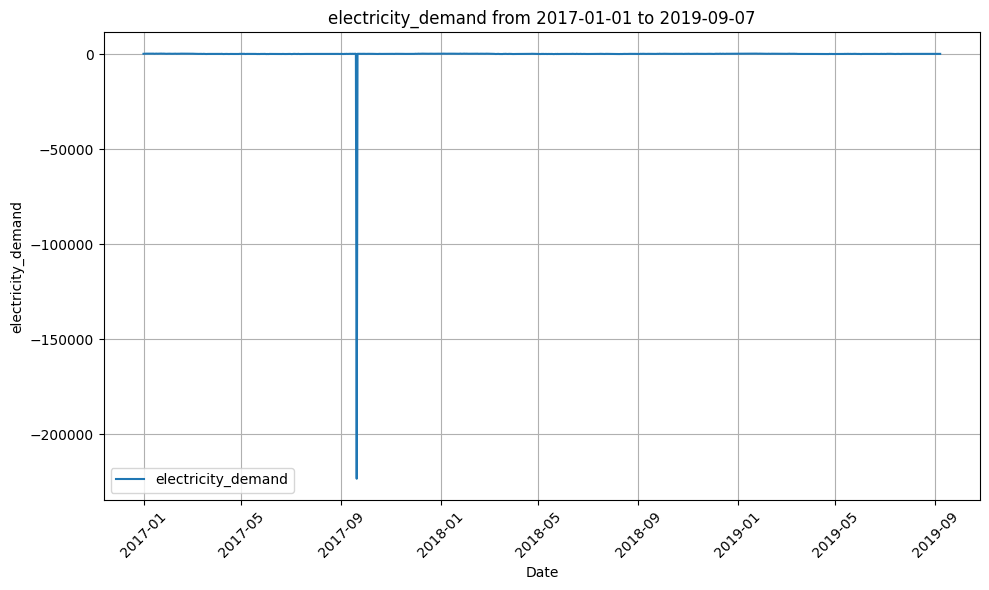

In [73]:
plot_feature_over_time(data, 'electricity_demand', '2017-01-01', '2019-09-07')

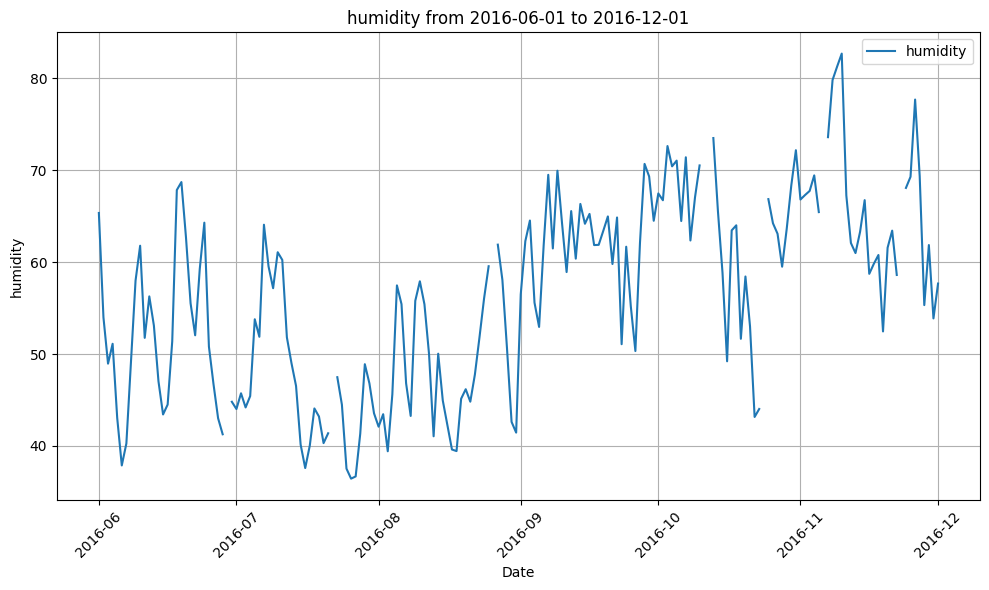

In [74]:
plot_feature_over_time(data, 'humidity', '2016-06-01', '2016-12-01')

### Data Preprocessing Evaluation Strategy

In [75]:
# Provide a complete data preprocessing transformations

In [76]:
exact_duplicates = data[data.duplicated()]
print("Exact duplicates:")
print(exact_duplicates)

Exact duplicates:
           date weather_condition   humidity  wind_speed  \
6    2015-01-13            Cloudy  58.649834  28.75 km/h   
52   2015-02-27             Snowy  61.321278  11.61 km/h   
59   2015-03-05            Cloudy  54.187891    1.02 m/s   
129  2015-05-13             Rainy  73.325559    0.00 m/s   
141  2015-05-24            Cloudy  62.308585   9.01 km/h   
...         ...               ...        ...         ...   
1838 2019-10-26             Sunny  53.952131    4.30 m/s   
1875 2019-12-01             Snowy  72.532746    3.99 m/s   
1886 2019-12-11               NaN  61.201308  27.61 km/h   
1893 2019-12-17             Snowy  65.362283    5.21 m/s   
1906 2019-12-29             Rainy  68.085227    7.24 m/s   

     oil_brent_price_indicator  temperature_station1  temperature_station2  \
6                         High             -5.037719             -4.891658   
52                    Moderate             -0.765329             -1.089098   
59                    Very 

In [77]:
def detect_outliers_iqr_all(df):
    # Colonnes numériques uniquement
    num_cols = df.select_dtypes(include=["number"]).columns

    outliers = pd.DataFrame(False, index=df.index, columns=num_cols)

    for col in num_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers[col] = (df[col] < lower) | (df[col] > upper)

    return outliers

outlier_mask = detect_outliers_iqr_all(data)

print(outlier_mask.sum())


humidity                 3
temperature_station1     0
temperature_station2     0
temperature_station3     0
temperature_station4     0
temperature_station5     0
temperature_station6     0
temperature_station7     0
temperature_station8     0
temperature_station9     0
temperature_station10    0
electricity_demand       2
dtype: int64


In [78]:
# 1. Handle Inconsistencies
def handle_inconsistencies(X_train, y_train, X_val=None):
    X_train['date'] = pd.to_datetime(X_train['date'])

    X = pd.DataFrame()
    # On sépare en deux colonnes : valeur et unité
    X[["valeur", "unite"]] = X_train["wind_speed"].str.extract(r'([\d.]+)\s*(\w+/?.*)')
    # Conversion en float
    X["valeur"] = X["valeur"].astype(float)
    # Conversion en m/s
    X["vitesse_m/s"] = X.apply(
        lambda row: row["valeur"] if row["unite"] == "m/s" else row["valeur"] / 3.6,
        axis=1
    )
    # On remplace les valeurs de la colonne wind_speed par les valeurs de vitesse_m/s
    X_train["wind_speed"] = X["vitesse_m/s"]

    if X_val is not None:
        X_val['date'] = pd.to_datetime(X_val['date'])

        X = pd.DataFrame()
        # On sépare en deux colonnes : valeur et unité
        X[["valeur", "unite"]] = X_val["wind_speed"].str.extract(r'([\d.]+)\s*(\w+/?.*)')
        # Conversion en float
        X["valeur"] = X["valeur"].astype(float)
        # Conversion en m/s
        X["vitesse_m/s"] = X.apply(
            lambda row: row["valeur"] if row["unite"] == "m/s" else row["valeur"] / 3.6,
            axis=1
        )
        # On remplace les valeurs de la colonne wind_speed par les valeurs de vitesse_m/s
        X_val["wind_speed"] = X["vitesse_m/s"]
        return X_train.copy(), y_train, X_val.copy()
    else:
        return X_train.copy(), y_train

# 2. Handling Duplicates
def handle_duplicates(X_train, y_train, X_val=None):
    X_train_no_duplicates = X_train.drop_duplicates()
    y_train_no_duplicates = y_train.loc[X_train_no_duplicates.index]
    if X_val is not None:
        X_val_no_duplicates = X_val.drop_duplicates()
        return X_train_no_duplicates.copy(), y_train_no_duplicates, X_val_no_duplicates.copy()
    else:
        return X_train_no_duplicates.copy(), y_train_no_duplicates

# 3. Handling Missing Values
def handle_missing_values(X_train, y_train, X_val=None):
    # On remplace les morceaux manquants par une interpollation linéaire
    X_train["humidity"] = X_train["humidity"].interpolate(method="linear")

    X_train = X_train.fillna(method="ffill").fillna(method="bfill")
    if X_val is not None:
        X_val["humidity"] = X_val["humidity"].interpolate(method="linear")

        X_val = X_val.fillna(method="ffill").fillna(method="bfill")
        return X_train.copy(), X_val.copy()
    else:
        return X_train.copy()

# 4. Handling Categorical Values
def handle_categorical(X_train, y_train, X_val=None):
    # Ordinal encoding (useful for ordinal data where the order matters)
    encoder = OrdinalEncoder(categories=[['Snowy','Rainy','Cloudy', 'Sunny']])
    X_train['weather_condition'] = encoder.fit_transform(X_train[['weather_condition']])
    encoder2 = OrdinalEncoder(categories=[['Very Low','Low','Moderate','High','Very High']])
    X_train['oil_brent_price_indicator'] = encoder2.fit_transform(X_train[['oil_brent_price_indicator']])
    if X_val is not None:
        X_val['weather_condition'] = encoder.transform(X_val[['weather_condition']])
        X_val['oil_brent_price_indicator'] = encoder2.transform(X_val[['oil_brent_price_indicator']])
        return X_train.copy(), X_val.copy()
    else:
        return X_train.copy()

# 5. Handling Outliers
def handle_outliers(X_train, y_train, X_val=None):
    def X_IQR(df, columns):
        for column in columns:
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df[column] = np.clip(df[column], lower_bound, upper_bound)
        return df
    # On n'utilise pas cette fonction
    def y_IQR(y):
        Q1 = y.quantile(0.25)
        Q3 = y.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return np.clip(y, lower_bound, upper_bound)

    column = ['humidity']
    X_train = X_IQR(X_train.copy(), column)

    y_train = y_train.mask(y_train < 0, np.mean(y_train))
    if X_val is not None:
        X_val = X_IQR(X_val.copy(), column)
        return X_train, y_train, X_val
    else:
        return X_train, y_train

# 6. Feature Engineering
def feature_engineering(X_train, y_train, X_val=None):
    def add_datetime_features(X):
        X['year'] = X['date'].dt.year
        X['month'] = X['date'].dt.month
        X['day'] = X['date'].dt.day
        return X
    X_train = add_datetime_features(X_train)

    if X_val is not None:
        X_val = add_datetime_features(X_val)
        return X_train.copy(), y_train, X_val.copy()
    else:
        return X_train.copy(), y_train

# 7. Feature Selection and Dimensionality Reduction
def feature_selection(X_train, y_train, X_val=None):
    selected_columns = ['weather_condition', 'humidity', 'wind_speed', 'oil_brent_price_indicator', 'temperature_station1',
       'temperature_station2', 'temperature_station3', 'temperature_station4',
       'temperature_station5', 'temperature_station6', 'temperature_station7',
       'temperature_station8', 'temperature_station9', 'temperature_station10',
       'year', 'month', 'day']
    if X_val is not None:
        return X_train[selected_columns], X_val[selected_columns]
    else:
        return X_train[selected_columns]

In [79]:

def evaluate_pipeline(X, y, n_splits=5):

    ### call transformations here, if there is no learning and no need to be crossval
    X, y = handle_inconsistencies(X, y)
    X, y = handle_duplicates(X, y)
    X = handle_missing_values(X, y)
    # X = handle_categorical(X, y)
    X, y = handle_outliers(X, y)
    X, y = feature_engineering(X, y)
    X = feature_selection(X, y)

    model = RandomForestRegressor()

    tscv = TimeSeriesSplit(n_splits=n_splits)

    train_scores = []
    val_scores = []

    X_trains = []
    X_vals = []
    y_trains = []
    y_vals = []

    for fold, (train_index, val_index) in enumerate(tscv.split(X)):
        print(f"Processing fold {fold + 1}/{n_splits}...")

        # Split data into train and validation sets
        X_train, X_val = X.iloc[train_index].copy(), X.iloc[val_index].copy()
        y_train, y_val = y.iloc[train_index].copy(), y.iloc[val_index].copy()

        X_trains.append(X_train)
        X_vals.append(X_val)
        y_trains.append(y_train)
        y_vals.append(y_val)

        ### call transformations here, if there is learning
        # X_train, y_train, X_val = handle_inconsistencies(X_train, y_train, X_val)
        # X_train, y_train, X_val = handle_duplicates(X_train, y_train, X_val)
        # X_train, X_val = handle_missing_values(X_train, y_train, X_val)
        X_train, X_val = handle_categorical(X_train, y_train, X_val)
        # X_train, y_train, X_val = handle_outliers(X_train, y_train, X_val)
        # X_train, y_train, X_val = feature_engineering(X_train, y_train, X_val)
        # X_train, X_val = feature_selection(X_train, y_train, X_val)

        # Train the model
        model.fit(X_train, y_train)

        # Predict on training set
        y_train_pred = model.predict(X_train)
        train_mse = mean_squared_error(y_train, y_train_pred)
        train_scores.append(train_mse)

        # Predict on validation set
        y_val_pred = model.predict(X_val)
        val_mse = mean_squared_error(y_val, y_val_pred)
        val_scores.append(val_mse)

        print(f"Fold {fold + 1} Train MSE: {train_mse:.4f}, Validation MSE: {val_mse:.4f}")

    # Compute mean, max, and min values for train and validation MSE
    mean_train_mse = np.mean(train_scores)
    max_train_mse = np.max(train_scores)
    min_train_mse = np.min(train_scores)

    mean_val_mse = np.mean(val_scores)
    max_val_mse = np.max(val_scores)
    min_val_mse = np.min(val_scores)

    # Print results
    print("\nTrain MSE:")
    print(f"Mean: {mean_train_mse:.4f}, Max: {max_train_mse:.4f}, Min: {min_train_mse:.4f}")

    print("\nValidation MSE:")
    print(f"Mean: {mean_val_mse:.4f}, Max: {max_val_mse:.4f}, Min: {min_val_mse:.4f}")

    return mean_val_mse, X_trains, X_vals, y_trains, y_vals  # Return mean validation MSE as the overall score

In [80]:
# Prepare X and y
X = df_train.copy().drop(columns=['electricity_demand'], axis=1)
y = df_train.copy().pop('electricity_demand')

# Run the evaluation
evaluate_pipeline(X, y)

/tmp/ipython-input-3799287657.py:52: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_train = X_train.fillna(method="ffill").fillna(method="bfill")


Processing fold 1/5...
Fold 1 Train MSE: 57.3338, Validation MSE: 509.7668
Processing fold 2/5...
Fold 2 Train MSE: 56.8699, Validation MSE: 441.5235
Processing fold 3/5...
Fold 3 Train MSE: 52.5425, Validation MSE: 490.9304
Processing fold 4/5...
Fold 4 Train MSE: 56.5351, Validation MSE: 401.4301
Processing fold 5/5...
Fold 5 Train MSE: 53.2488, Validation MSE: 471.3313

Train MSE:
Mean: 55.3060, Max: 57.3338, Min: 52.5425

Validation MSE:
Mean: 462.9964, Max: 509.7668, Min: 401.4301


(np.float64(462.9964097235426),
 [     weather_condition   humidity  wind_speed  oil_brent_price_indicator  \
  0                  2.0  69.304377    7.705556                        2.0   
  1                  3.0  55.955975    6.050000                        2.0   
  2                  1.0  62.701614    6.830000                        2.0   
  3                  0.0  60.375001    5.790000                        2.0   
  4                  0.0  59.512418    6.983333                        3.0   
  ..                 ...        ...         ...                        ...   
  309                3.0  54.021548    2.000000                        1.0   
  310                1.0  67.993411    2.830000                        1.0   
  311                3.0  58.003882    3.547222                        3.0   
  312                2.0  57.588312    2.860000                        2.0   
  313                3.0  49.581771    5.680000                        2.0   
  
       temperature_station1  

### Generating Submission File

In [ ]:
# Train and submit your results

In [86]:
# Prepare X_train and y_train from your data
df_train =  pd.read_csv("module5_exercise_train.csv", sep=",")

X_train = df_train.drop(columns=['electricity_demand'], axis=1)
y_train = df_train['electricity_demand']

X_test =  pd.read_csv("module5_exercise_test.csv", sep=",")

In [84]:
def train_and_predict_to_submit(X_train, y_train, X_test):
    model = RandomForestRegressor()

    X_train, y_train, X_test = handle_inconsistencies(X_train, y_train, X_test)
    X_train, y_train, X_test = handle_duplicates(X_train, y_train, X_test)
    X_train, X_test = handle_missing_values(X_train, y_train, X_test)
    X_train, X_test = handle_categorical(X_train, y_train, X_test)
    X_train, y_train, X_test = handle_outliers(X_train, y_train, X_test)
    X_train, y_train, X_test = feature_engineering(X_train, y_train, X_test)
    X_train, X_test = feature_selection(X_train, y_train, X_test)

    # Train the model on the entire training set
    print(f"Training model on entire dataset of shape: {X_train.shape}")
    model.fit(X_train, y_train)

    # Predict on the test set
    print(f"Predicting on test dataset of shape: {X_test.shape}")
    y_test_pred = model.predict(X_test)

    return y_test_pred

In [87]:
# Call serve_model to train and predict
y_test_pred = train_and_predict_to_submit(X_train, y_train, X_test)

/tmp/ipython-input-3799287657.py:52: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_train = X_train.fillna(method="ffill").fillna(method="bfill")
/tmp/ipython-input-3799287657.py:56: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_val = X_val.fillna(method="ffill").fillna(method="bfill")


Training model on entire dataset of shape: (1819, 17)
Predicting on test dataset of shape: (365, 17)


In [88]:
# Generating Submission File
submission = pd.DataFrame({
    'date': X_test['date'],
    'electricity_demand': y_test_pred
})

# Save the submission file
submission.to_csv('submission.csv', index=False, sep=',')
print("Submission file saved as 'submission.csv'.")

Submission file saved as 'submission.csv'.


In [89]:
from google.colab import files
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>